# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty.

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [1]:
%pip install --upgrade plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 28.4 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.24.1
    Uninstalling plotly-5.24.1:
      Successfully uninstalled plotly-5.24.1


## Import Statements

In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [5]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames?
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [6]:
print("Median Household Income:")
print(df_hh_income.shape)
print(df_hh_income.columns)

Median Household Income:
(29322, 3)
Index(['Geographic Area', 'City', 'Median Income'], dtype='object')


In [7]:
print("People Below Poverty Level:")
print(df_pct_poverty.shape)
print(df_pct_poverty.columns)

Percentage of People Below Poverty Level:
(29329, 3)
Index(['Geographic Area', 'City', 'poverty_rate'], dtype='object')


In [8]:
print("People Over 25 Completed High School:")
print(df_pct_completed_hs.shape)
print(df_pct_completed_hs.columns)

People Over 25 Completed High School:
(29329, 3)
Index(['Geographic Area', 'City', 'percent_completed_hs'], dtype='object')


In [9]:
print("Share of Race by City:")
print(df_share_race_city.shape)
print(df_share_race_city.columns)

Share of Race by City:
(29268, 7)
Index(['Geographic area', 'City', 'share_white', 'share_black',
       'share_native_american', 'share_asian', 'share_hispanic'],
      dtype='object')


In [10]:
print("Deaths by Police by US:")
print(df_fatalities.shape)
print(df_fatalities.columns)

Deaths by Police by US:
(2535, 14)
Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')


## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate.

In [11]:
# Check for missing values
print("Missing values in each dataset:")
print("Median Household Income:", df_hh_income.isna().sum().sum())
print("Poverty Level:", df_pct_poverty.isna().sum().sum())
print("High School Completion:", df_pct_completed_hs.isna().sum().sum())
print("Race by City:", df_share_race_city.isna().sum().sum())
print("Fatalities:", df_fatalities.isna().sum().sum())

Missing values in each dataset:
Median Household Income: 51
Poverty Level: 0
High School Completion: 0
Race by City: 0
Fatalities: 346


In [12]:
# Check for duplicates
print("\nDuplicate rows in each dataset:")
print("Median Household Income:", df_hh_income.duplicated().sum())
print("Poverty Level:", df_pct_poverty.duplicated().sum())
print("High School Completion:", df_pct_completed_hs.duplicated().sum())
print("Race by City:", df_share_race_city.duplicated().sum())
print("Fatalities:", df_fatalities.duplicated().sum())


Duplicate rows in each dataset:
Median Household Income: 0
Poverty Level: 0
High School Completion: 0
Race by City: 0
Fatalities: 0


# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

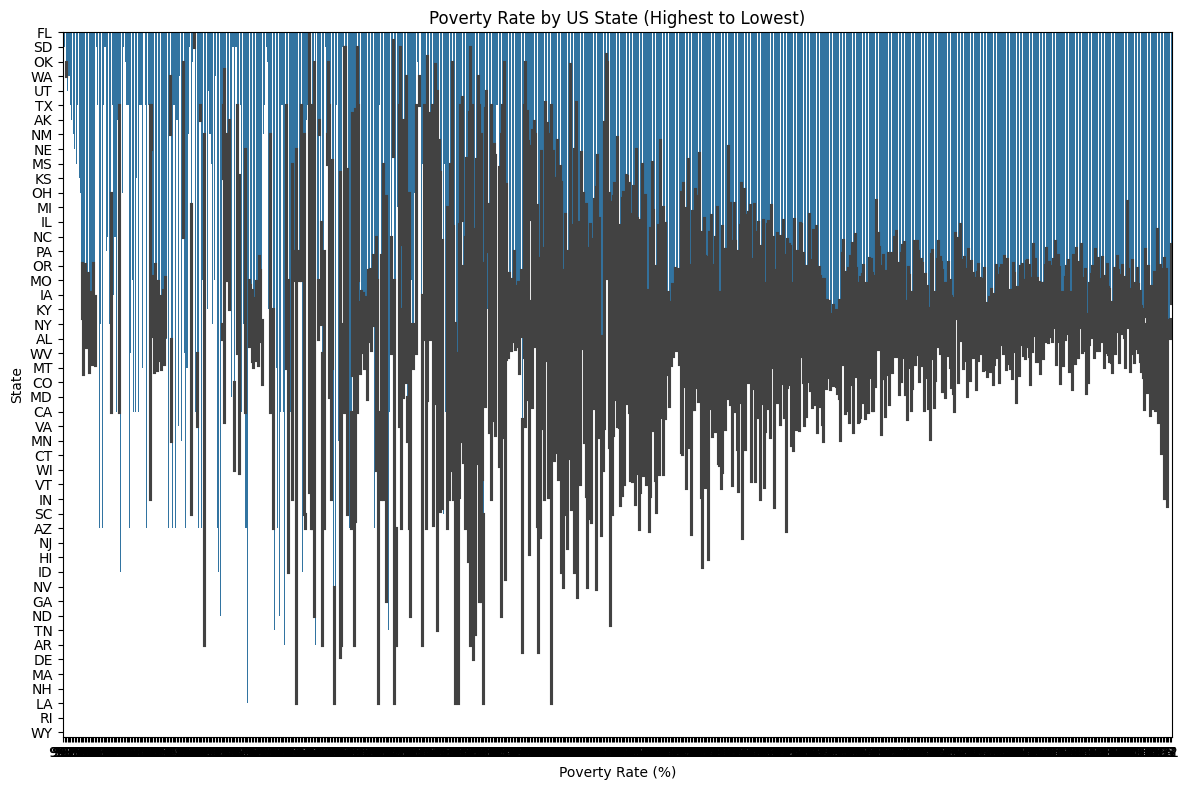

In [13]:
# Clean and sort the data
df_poverty_sorted = df_pct_poverty.dropna().sort_values('poverty_rate', ascending=False)

# Create the plot
plt.figure(figsize=(12, 8))
sns.barplot(x='poverty_rate', y='Geographic Area', data=df_poverty_sorted)
plt.title('Poverty Rate by US State (Highest to Lowest)')
plt.xlabel('Poverty Rate (%)')
plt.ylabel('State')
plt.tight_layout()
plt.show()

In [14]:
# Highest and Lowest
print("State with highest poverty rate:", df_poverty_sorted.iloc[0]['Geographic Area'])
print("State with lowest poverty rate:", df_poverty_sorted.iloc[-1]['Geographic Area'])

State with highest poverty rate: FL
State with lowest poverty rate: PA


# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

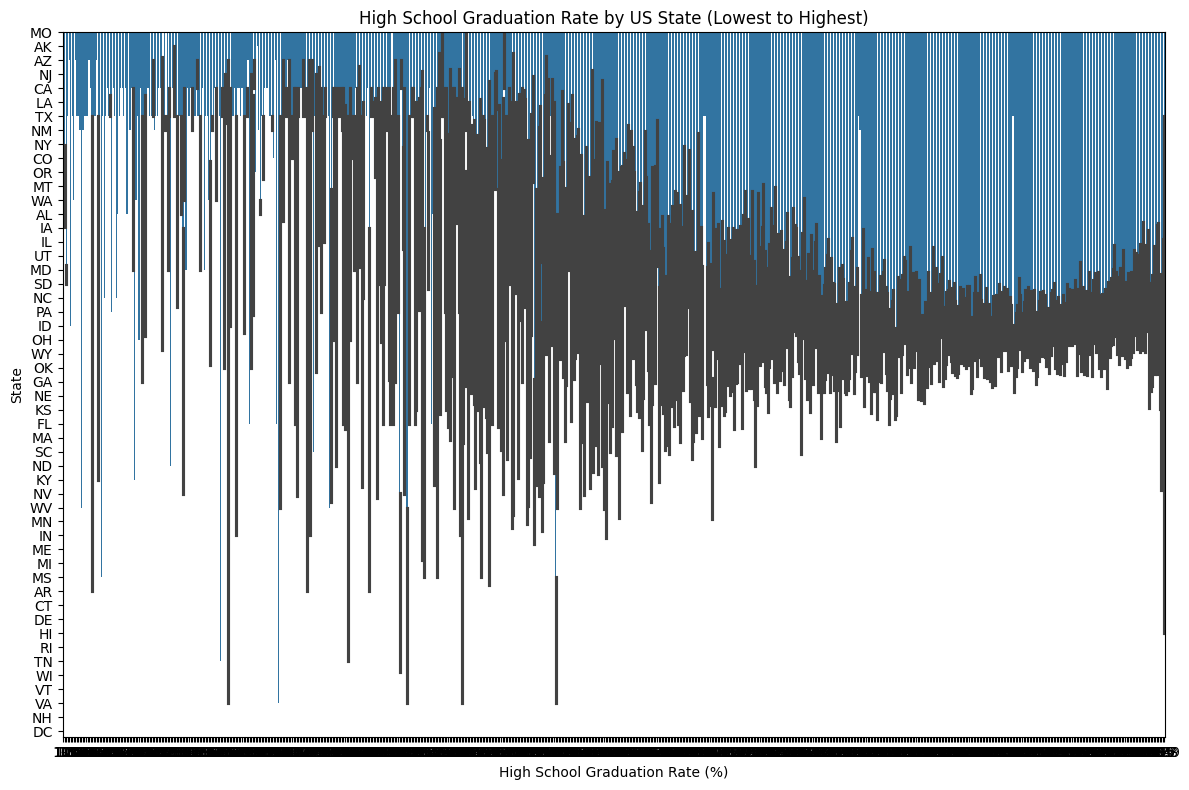

In [15]:
# Clean and sort the data
df_hs_sorted = df_pct_completed_hs.dropna().sort_values('percent_completed_hs')

# Create the plot
plt.figure(figsize=(12, 8))
sns.barplot(x='percent_completed_hs', y='Geographic Area', data=df_hs_sorted)
plt.title('High School Graduation Rate by US State (Lowest to Highest)')
plt.xlabel('High School Graduation Rate (%)')
plt.ylabel('State')
plt.tight_layout()
plt.show()

In [16]:
# Print highest and lowest
print("State with highest graduation rate:", df_hs_sorted.iloc[-1]['Geographic Area'])
print("State with lowest graduation rate:", df_hs_sorted.iloc[0]['Geographic Area'])

State with highest graduation rate: HI
State with lowest graduation rate: MO


# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

<Figure size 1400x800 with 0 Axes>

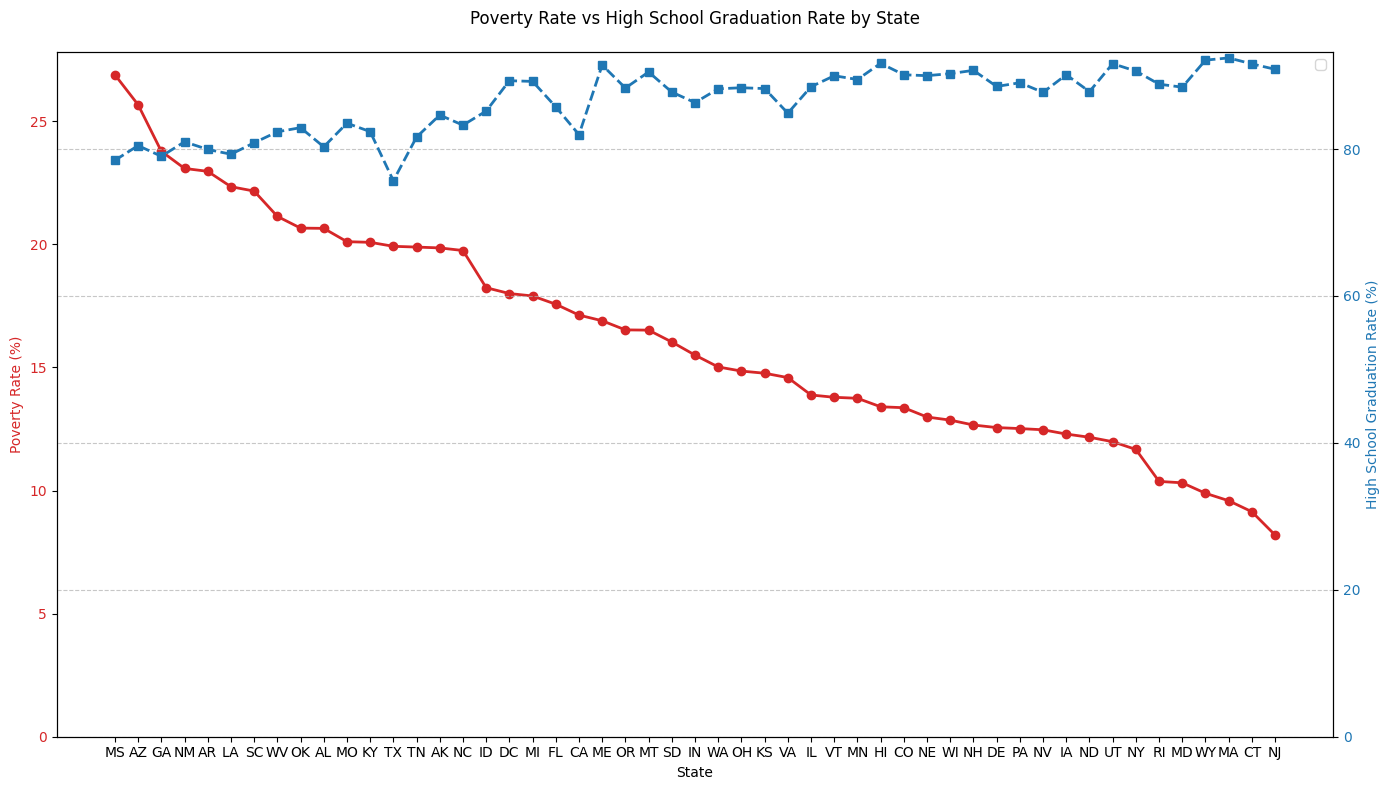

In [20]:
# First ensure proper data cleaning before merging
# Convert poverty_rate to numeric (handling European decimal commas if needed)
df_pct_poverty['poverty_rate'] = pd.to_numeric(df_pct_poverty['poverty_rate'].str.replace(',', '.'), errors='coerce')
df_pct_completed_hs['percent_completed_hs'] = pd.to_numeric(df_pct_completed_hs['percent_completed_hs'].str.replace(',', '.'), errors='coerce')

# Group by state and calculate means
poverty_by_state = df_pct_poverty.groupby('Geographic Area')['poverty_rate'].mean()
hs_by_state = df_pct_completed_hs.groupby('Geographic Area')['percent_completed_hs'].mean()

# Merge the datasets
df_combined = pd.merge(
    poverty_by_state.reset_index(),
    hs_by_state.reset_index(),
    on='Geographic Area'
)

# Sort by poverty rate for better visualization
df_combined = df_combined.sort_values('poverty_rate', ascending=False)

# Create the plot
plt.figure(figsize=(14, 8))
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot poverty rate (left axis)
color = 'tab:red'
ax1.set_xlabel('State')
ax1.set_ylabel('Poverty Rate (%)', color=color)
ax1.plot(df_combined['Geographic Area'], df_combined['poverty_rate'],
         color=color, marker='o', linestyle='-', linewidth=2)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(bottom=0)  # Start y-axis at 0

# Create second y-axis for graduation rate
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('High School Graduation Rate (%)', color=color)
ax2.plot(df_combined['Geographic Area'], df_combined['percent_completed_hs'],
         color=color, marker='s', linestyle='--', linewidth=2)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(bottom=0)  # Start y-axis at 0

# Customize the plot
plt.title('Poverty Rate vs High School Graduation Rate by State', pad=20)
plt.xticks(rotation=90)
plt.grid(True, linestyle='--', alpha=0.7)

# Add legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, ['Poverty Rate', 'HS Graduation Rate'], loc='upper right')

plt.tight_layout()
plt.show()

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

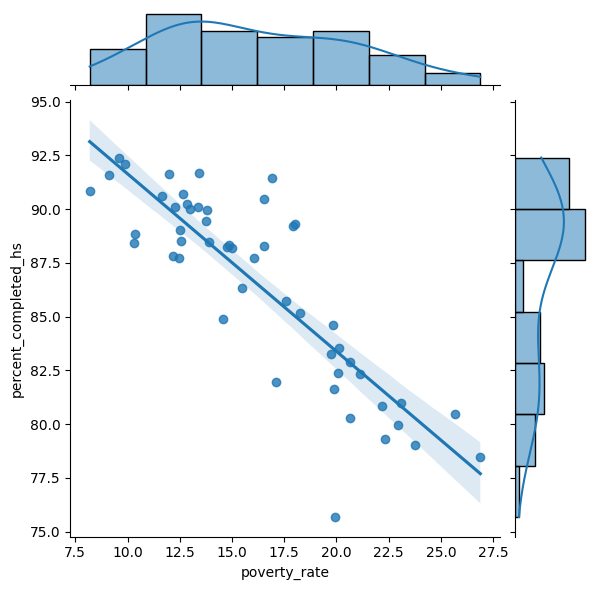

In [21]:
sns.jointplot(x='poverty_rate', y='percent_completed_hs', data=df_combined, kind='reg')
plt.show()

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio.

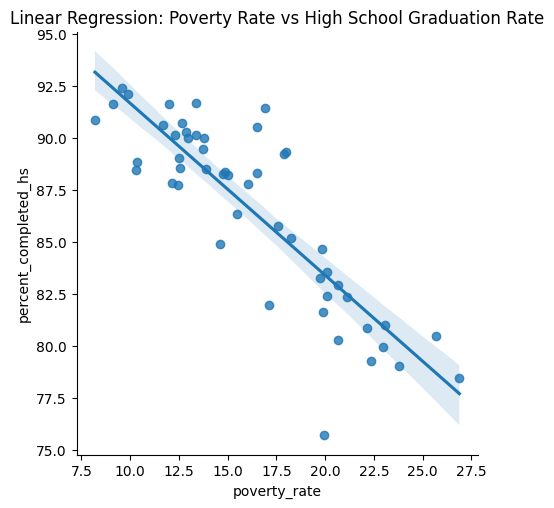

In [22]:
sns.lmplot(x='poverty_rate', y='percent_completed_hs', data=df_combined)
plt.title('Linear Regression: Poverty Rate vs High School Graduation Rate')
plt.show()

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections.

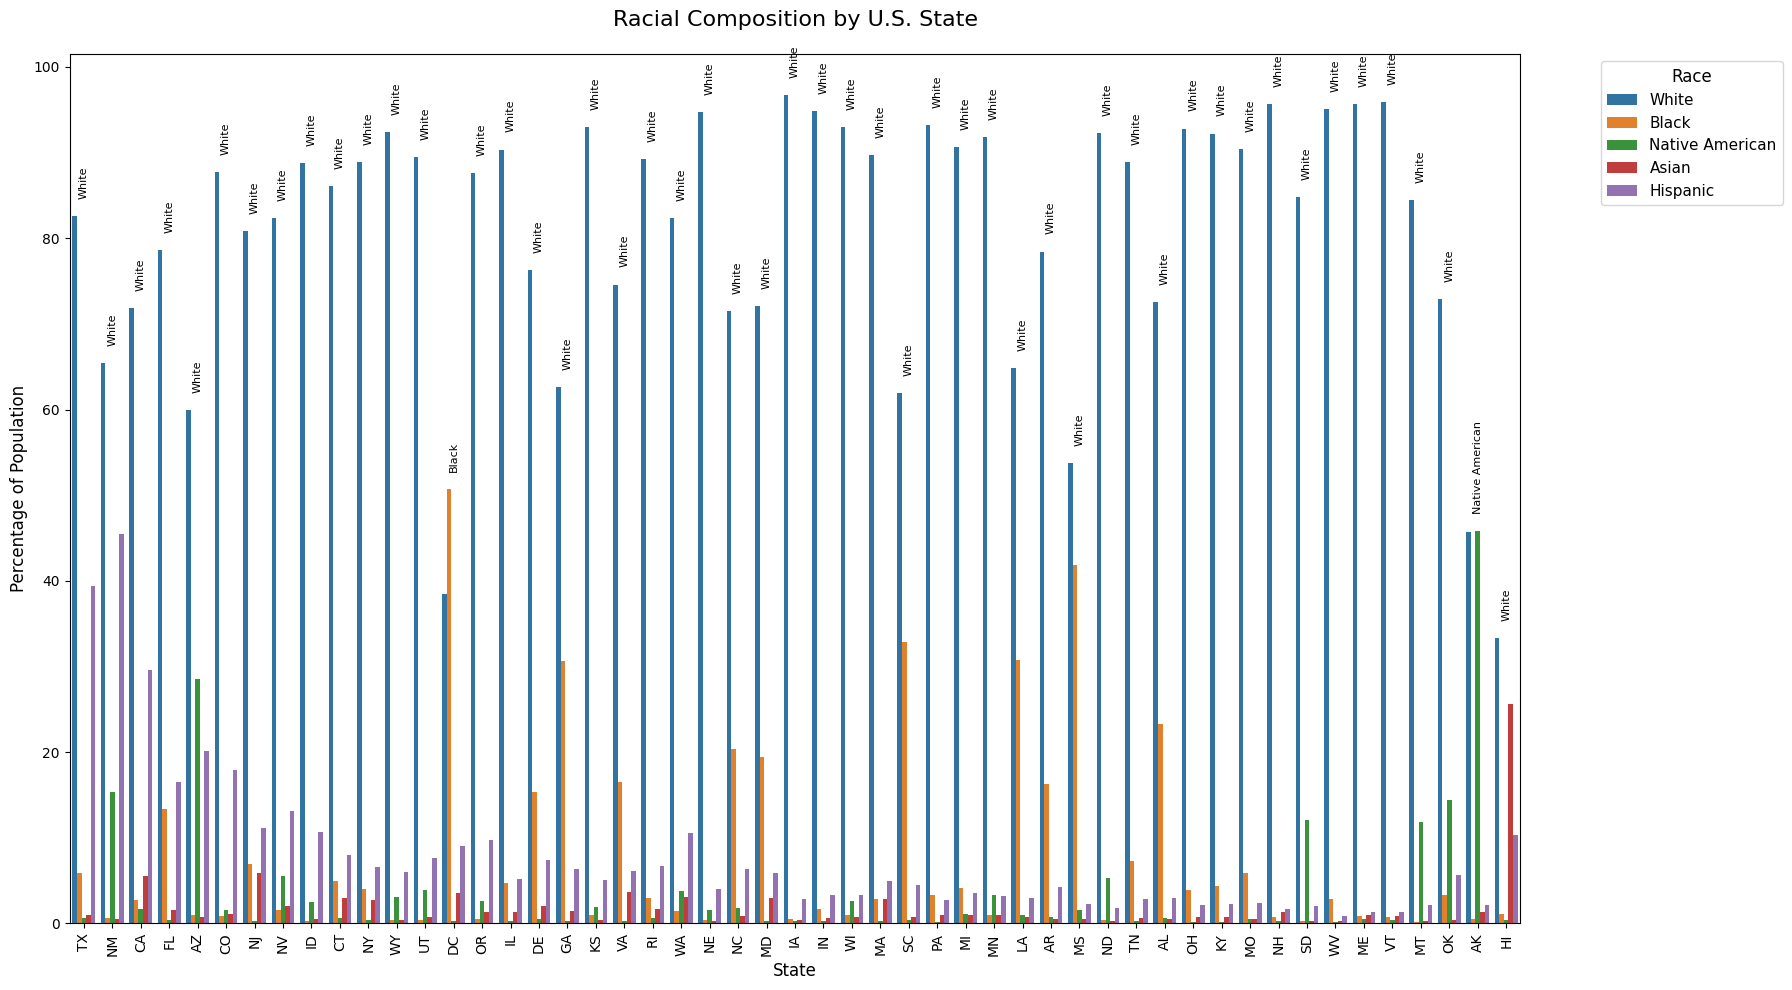

In [24]:
# First, ensure the race share columns are numeric
race_columns = ['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']
for col in race_columns:
    df_share_race_city[col] = pd.to_numeric(df_share_race_city[col], errors='coerce')

# Group by state and calculate mean percentages
df_race_state = df_share_race_city.groupby('Geographic area')[race_columns].mean().reset_index()

# Melt the dataframe for easier plotting
df_melted = df_race_state.melt(id_vars='Geographic area',
                              value_vars=race_columns,
                              var_name='race',
                              value_name='percentage')

# Clean up race labels for the legend
race_labels = {
    'share_white': 'White',
    'share_black': 'Black',
    'share_native_american': 'Native American',
    'share_asian': 'Asian',
    'share_hispanic': 'Hispanic'
}
df_melted['race'] = df_melted['race'].map(race_labels)

# Sort states by total population for better visualization
state_order = df_race_state.set_index('Geographic area').sum(axis=1).sort_values(ascending=False).index
df_melted['Geographic area'] = pd.Categorical(df_melted['Geographic area'], categories=state_order, ordered=True)

# Create the plot
plt.figure(figsize=(18, 10))
ax = sns.barplot(x='Geographic area', y='percentage', hue='race', data=df_melted,
                 palette=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])

# Customize the plot
plt.title('Racial Composition by U.S. State', fontsize=16, pad=20)
plt.xlabel('State', fontsize=12)
plt.ylabel('Percentage of Population', fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Race', title_fontsize=12, fontsize=11, bbox_to_anchor=(1.05, 1), loc='upper left')

# Add value labels for the largest racial group in each state
for i, state in enumerate(state_order):
    max_race = df_race_state.loc[df_race_state['Geographic area'] == state, race_columns].idxmax(axis=1).values[0]
    max_value = df_race_state.loc[df_race_state['Geographic area'] == state, max_race].values[0]
    ax.text(i, max_value + 2, race_labels[max_race],
            ha='center', va='bottom', rotation=90, fontsize=8, color='black')

plt.tight_layout()
plt.show()

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

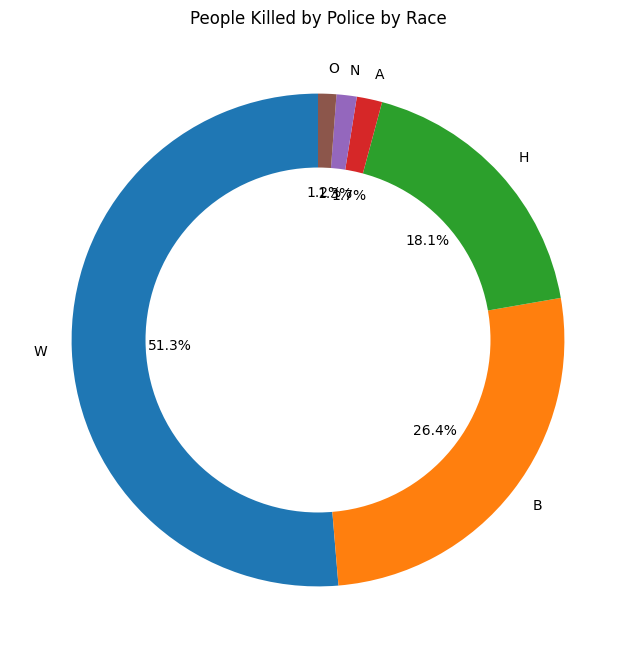

In [25]:
# Count fatalities by race
race_counts = df_fatalities['race'].value_counts()

# Create donut chart
plt.figure(figsize=(8, 8))
plt.pie(race_counts, labels=race_counts.index, autopct='%1.1f%%', startangle=90)
centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('People Killed by Police by Race')
plt.show()

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women.

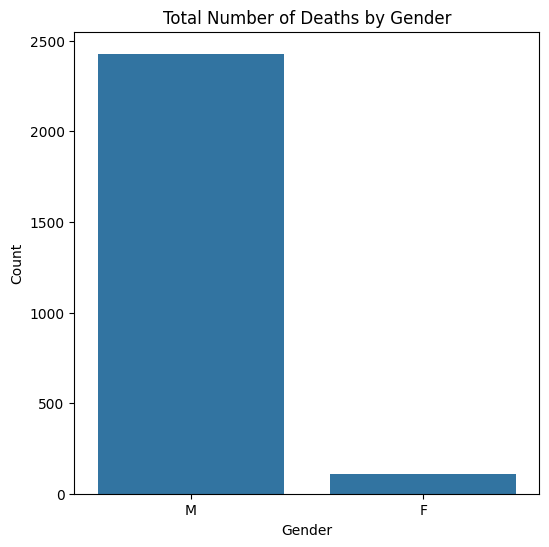

Ratio of male to female deaths: 22.7:1


In [26]:
# Count by gender
gender_counts = df_fatalities['gender'].value_counts()

# Create bar chart
plt.figure(figsize=(6, 6))
sns.barplot(x=gender_counts.index, y=gender_counts.values)
plt.title('Total Number of Deaths by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

print(f"Ratio of male to female deaths: {gender_counts['M']/gender_counts['F']:.1f}:1")

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death?

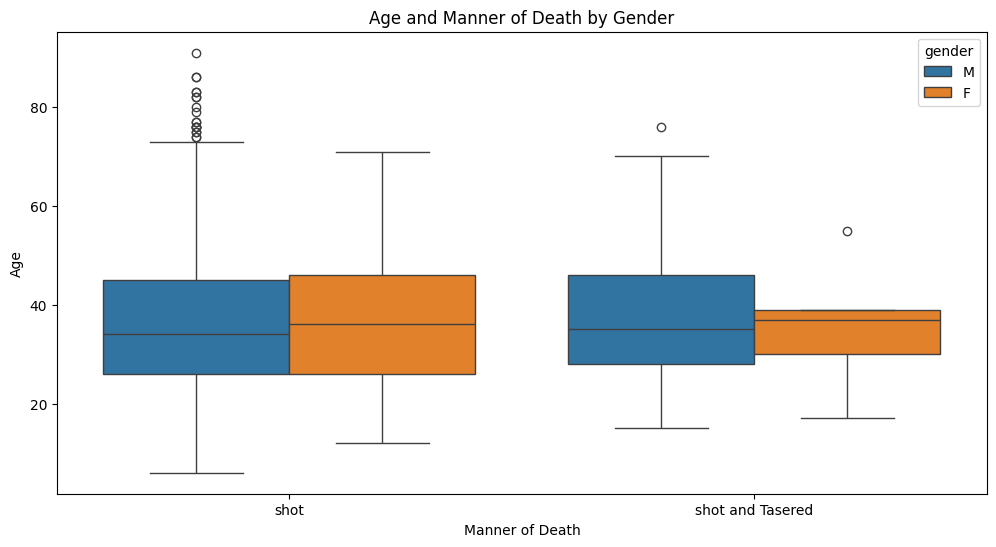

In [27]:
# Create boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='manner_of_death', y='age', hue='gender', data=df_fatalities)
plt.title('Age and Manner of Death by Gender')
plt.xlabel('Manner of Death')
plt.ylabel('Age')
plt.show()

# Were People Armed?

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed?

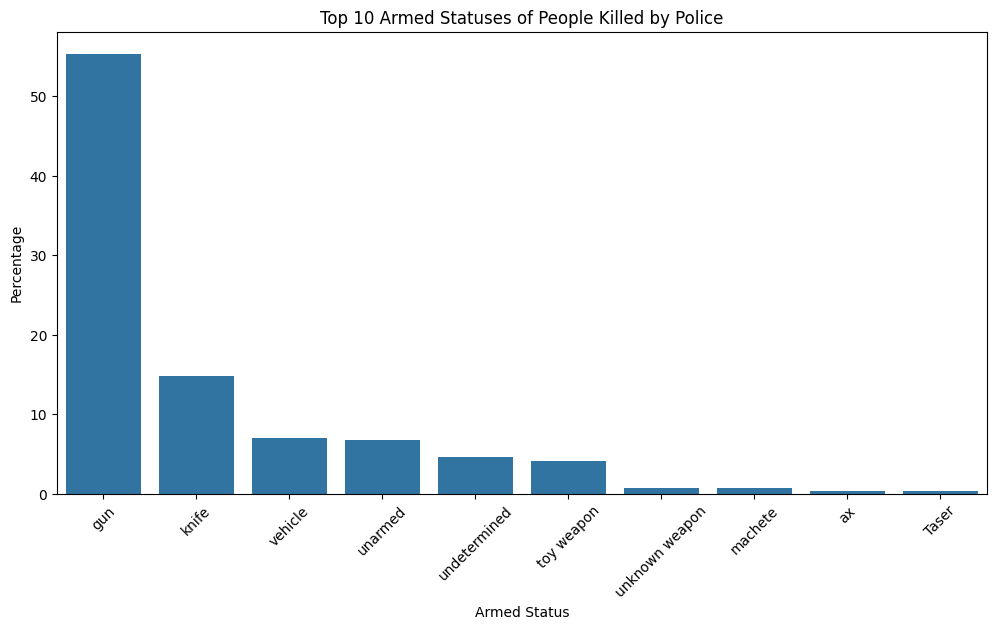

Percentage of people armed when killed: 93.3%


In [28]:
# Calculate armed status
armed_status = df_fatalities['armed'].value_counts(normalize=True) * 100

# Top 10 armed statuses
top_armed = armed_status.head(10)

# Create bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=top_armed.index, y=top_armed.values)
plt.title('Top 10 Armed Statuses of People Killed by Police')
plt.xlabel('Armed Status')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.show()

# Percentage armed vs unarmed
armed = (df_fatalities['armed'] != 'unarmed').mean() * 100
print(f"Percentage of people armed when killed: {armed:.1f}%")

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [29]:
# Percentage under 25
under_25 = (df_fatalities['age'] < 25).mean() * 100
print(f"Percentage of people killed under 25 years old: {under_25:.1f}%")

Percentage of people killed under 25 years old: 17.8%


Create a histogram and KDE plot that shows the distribution of ages of the people killed by police.

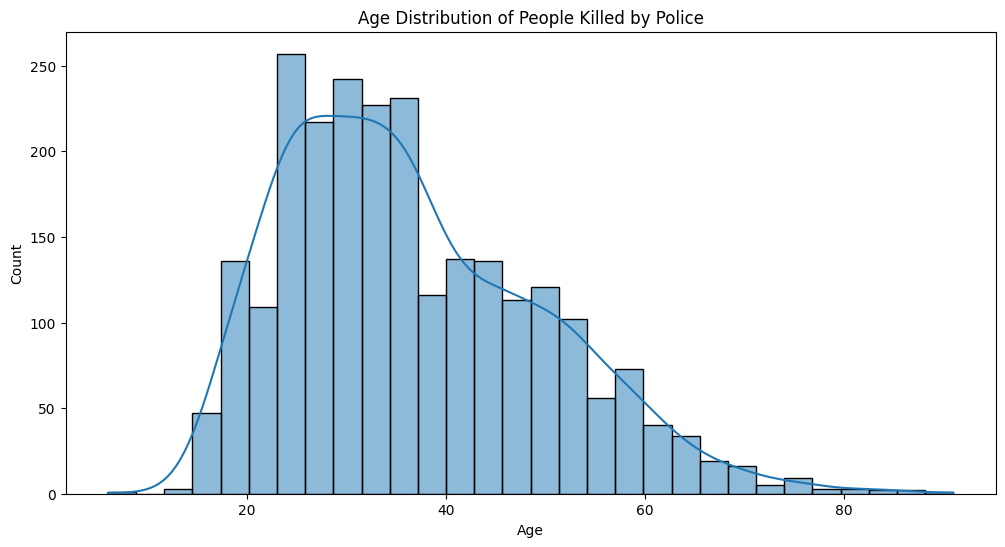

In [30]:
# Age distribution histogram and KDE
plt.figure(figsize=(12, 6))
sns.histplot(df_fatalities['age'].dropna(), kde=True, bins=30)
plt.title('Age Distribution of People Killed by Police')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Create a seperate KDE plot for each race. Is there a difference between the distributions?

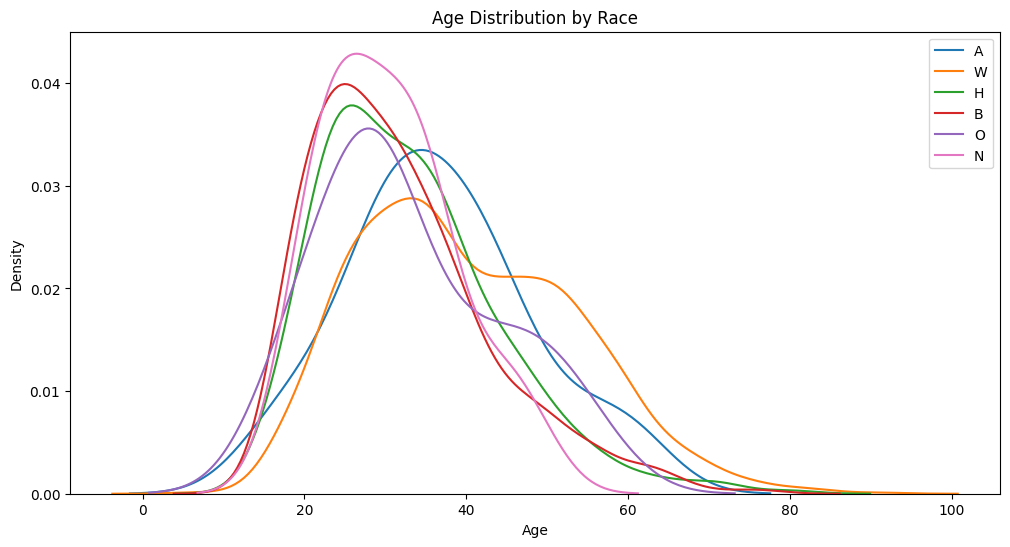

In [31]:
# KDE by race
plt.figure(figsize=(12, 6))
for race in df_fatalities['race'].unique():
    sns.kdeplot(df_fatalities[df_fatalities['race'] == race]['age'].dropna(), label=race)
plt.title('Age Distribution by Race')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()

# Race of People Killed

Create a chart that shows the total number of people killed by race.

In [34]:
# Count by race
race_counts = df_fatalities['race'].value_counts()
print(race_counts)

race
W    1201
B     618
H     423
A      39
N      31
O      28
Name: count, dtype: int64


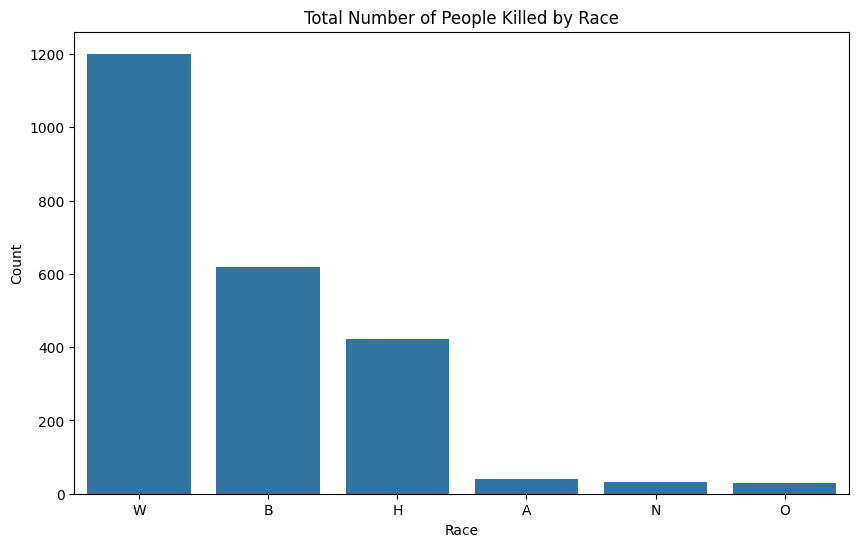

In [33]:
# Create bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=race_counts.index, y=race_counts.values)
plt.title('Total Number of People Killed by Race')
plt.xlabel('Race')
plt.ylabel('Count')
plt.show()

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [35]:
# Calculate percentage with mental illness
mental_illness = df_fatalities['signs_of_mental_illness'].mean() * 100
print(f"Percentage of people killed with signs of mental illness: {mental_illness:.1f}%")

Percentage of people killed with signs of mental illness: 25.0%


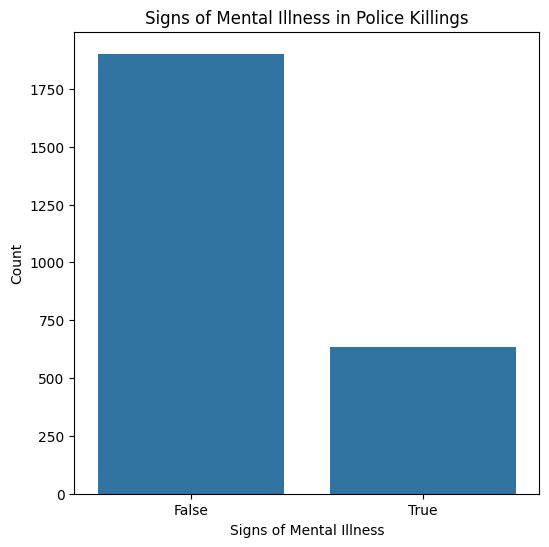

In [36]:
# Create bar chart
plt.figure(figsize=(6, 6))
sns.countplot(x='signs_of_mental_illness', data=df_fatalities)
plt.title('Signs of Mental Illness in Police Killings')
plt.xlabel('Signs of Mental Illness')
plt.ylabel('Count')
plt.show()

# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [37]:
# Count by city
top_cities = df_fatalities['city'].value_counts().head(10)
print(top_cities)

city
Los Angeles    39
Phoenix        31
Houston        27
Chicago        25
Las Vegas      21
San Antonio    20
Columbus       19
Miami          18
Austin         18
St. Louis      15
Name: count, dtype: int64


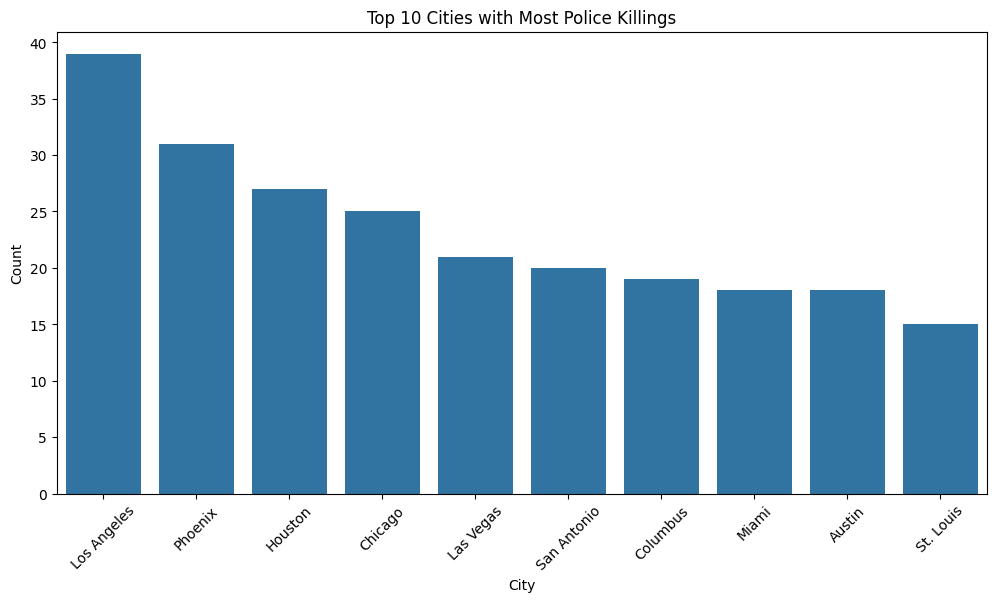

In [38]:
# Create bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=top_cities.index, y=top_cities.values)
plt.title('Top 10 Cities with Most Police Killings')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty?

In [42]:
# Count fatalities by state
state_counts = df_fatalities['state'].value_counts().reset_index()
state_counts.columns = ['state', 'counts']

In [43]:
# Create choropleth map
fig = px.choropleth(state_counts,
                    locations='state',
                    locationmode="USA-states",
                    color='counts',
                    scope="usa",
                    title='Police Killings by US State')
fig.show()

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data?

In [44]:
# Convert date to datetime
df_fatalities['date'] = pd.to_datetime(df_fatalities['date'])

<ipython-input-44-c18e267b7ecf>:2: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



In [45]:
# Extract year and month
df_fatalities['year'] = df_fatalities['date'].dt.year
df_fatalities['month'] = df_fatalities['date'].dt.month

In [46]:
# Count by year-month
monthly_counts = df_fatalities.groupby(['year', 'month']).size().reset_index(name='counts')
monthly_counts['date'] = pd.to_datetime(monthly_counts[['year', 'month']].assign(day=1))

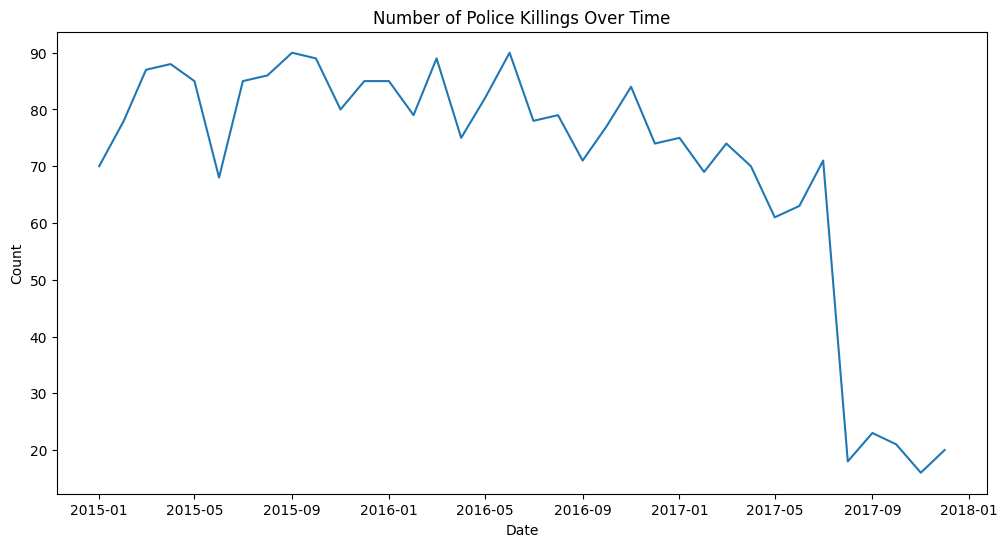

In [47]:
# Create line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='counts', data=monthly_counts)
plt.title('Number of Police Killings Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()